Let's try tackling the problem of credit card fraud detection using the data provided by Kaggle. Our aim is to try various methods of data cleaning and preprocessing and how they change the results of prediction. 

The link to the dataset is here: https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline 
card_df = pd.read_csv("./creditcard.csv") 
card_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


From looking at the csv file, it seems like the Time column is related to the time when the data was generated. I don't really know what the features Vi (i = 1,...,28) means. Amount is the transaction amount of the card and class is whether the transaction is real or fake (1 = FAKE transaction, 0 = REAL transaction). 

We will preprocess the dataframe such that we get rid of the Time column. We will also split the dataset into train and test data and we will use stratification so that the proportion of the labels will be approximately equal .  

In [2]:
from sklearn.model_selection import train_test_split 
def get_preprocessed_df(df=None): 
    df_copy = df.copy() 
    df_copy.drop('Time',axis=1,inplace=True) 
    return df_copy 

def get_train_test_df(df=None): 
    df_copy = get_preprocessed_df(df) 
    X_features = df_copy.iloc[:,:-1] 
    y_target = df_copy.iloc[:,-1] 
    X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,test_size=0.3,random_state=0,stratify=y_target)
    return X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = get_train_test_df(card_df) 

In [3]:
print("Train data label proportions")
print(y_train.value_counts()/y_train.shape[0] * 100)

print("Test data label proportions")
print(y_test.value_counts()/y_test.shape[0] * 100)

Train data label proportions
0    99.827451
1     0.172549
Name: Class, dtype: float64
Test data label proportions
0    99.826785
1     0.173215
Name: Class, dtype: float64


We see that the proportions of labels are about the same as intended. I will use logistic regression and lightGBM for predicting credit card frauds. 

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression 
# prints out various evaluation metrics 
def get_clf_eval(y_test,pred):  
    confusion = confusion_matrix(y_test,pred) 
    accuracy = accuracy_score(y_test,pred) 
    precision = precision_score(y_test,pred) 
    recall = recall_score(y_test,pred) 
    f1 = f1_score(y_test,pred) 
    print("Confusion matrix") 
    print(confusion) 
    print("Accuracy = {}, Precision = {}, Recall = {}, F1 = {}".format(accuracy,precision,recall,f1))


lr_clf = LogisticRegression() 
lr_clf.fit(X_train,y_train) 
lr_pred = lr_clf.predict(X_test) 
get_clf_eval(y_test,lr_pred) 

Confusion matrix
[[85282    13]
 [   59    89]]
Accuracy = 0.9991573329588147, Precision = 0.8725490196078431, Recall = 0.6013513513513513, F1 = 0.712


In [8]:
from lightgbm import LGBMClassifier 

''' We now use LightGBM ''' 
def get_model_train_eval(model,ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None): 
    model.fit(ftr_train,tgt_train) 
    pred = model.predict(ftr_test) 
    get_clf_eval(tgt_test,pred) 

lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

Confusion matrix
[[85289     6]
 [   36   112]]
Accuracy = 0.9995084442259752, Precision = 0.9491525423728814, Recall = 0.7567567567567568, F1 = 0.8421052631578948


Overall, the metrics for the lightGBM is much better than LogisticRegression (Accuracy,precision, recall and F1 score are all higher for LightGBM). 

Let us try to improve our analysis by changing the distribution of some features. The transaction amount is probably very important for detecting whether if the transaction is fraud or not. For models like logistic regression (which is a linear model), we have an assumption that the feature data follows a normal distribution. So perhaps we could normalize the data. 

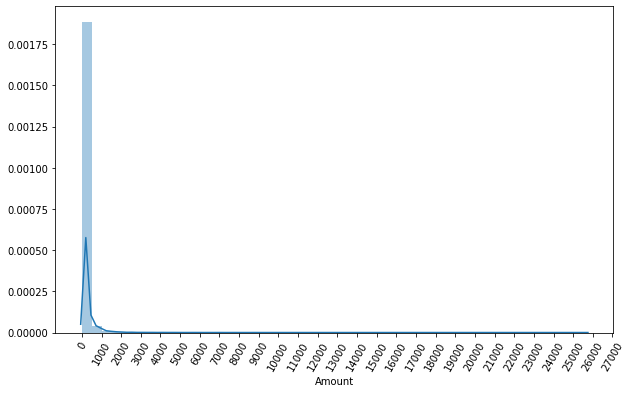

In [11]:
import seaborn as sns 
plt.figure(figsize=(10,6))
plt.xticks(range(0,30000,1000),rotation=60) 
sns.distplot(card_df['Amount']) 

We observe a long tail distribution where most of the values are centered between 0 and 1000. 

In [17]:
from sklearn.preprocessing import StandardScaler 
def get_preprocessed_df(df=None): 
    df_copy = df.copy() 
    scaler=StandardScaler() 
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) 
    df_copy.insert(0,'Amount_scaled',amount_n) 
    df_copy.drop(['Time','Amount'],axis=1,inplace=True) 
    return df_copy 

X_train, X_test, y_train, y_test = get_train_test_df(card_df) 
print("Logistic Regression") 
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

print("LightGBM")
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False) 
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)


Logistic Regression
Confusion matrix
[[85281    14]
 [   58    90]]
Accuracy = 0.9991573329588147, Precision = 0.8653846153846154, Recall = 0.6081081081081081, F1 = 0.7142857142857144
LightGBM
Confusion matrix
[[85289     6]
 [   36   112]]
Accuracy = 0.9995084442259752, Precision = 0.9491525423728814, Recall = 0.7567567567567568, F1 = 0.8421052631578948


Unfortunately, standardizing the amount of transaction does not seem to improve the results for both Logistic Regression and LightGBM. In this case perhaps Log transformation of transaction amount feature is more helpful than standardization.  

In [18]:
def get_preprocessed_df(df=None): 
    df_copy = df.copy() 
    amount_n = np.log1p(df_copy['Amount']) 
    df_copy.insert(0,'Amount_Scaled',amount_n) 
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    return df_copy 

X_train, X_test, y_train, y_test = get_train_test_df(card_df) 
print("Logistic Regression") 
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

print("LightGBM")
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False) 
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)


Logistic Regression
Confusion matrix
[[85283    12]
 [   59    89]]
Accuracy = 0.99916903666772, Precision = 0.8811881188118812, Recall = 0.6013513513513513, F1 = 0.714859437751004
LightGBM
Confusion matrix
[[85290     5]
 [   35   113]]
Accuracy = 0.9995318516437859, Precision = 0.9576271186440678, Recall = 0.7635135135135135, F1 = 0.849624060150376


It appears that log transform is slightly better than standardization. The precision, recall and F1 score for LightGBM is slightly higher than when we used standardization. 

Another method that may improve our prediction results would be to get rid of anomalies. I am going to try and get rid of anomalies in some features. There are many ways of doing this, but one way is to treat all values beyond some threshold as an anomaly. Specifically, we could use metrics like $[Q1-k*IQR, Q3+k*IQR]$, where Q1 and Q3 are the first and third quartile and the IQR is the inter quartile range. $k$ is some constant and here let us set it to $k = 1.5$. 

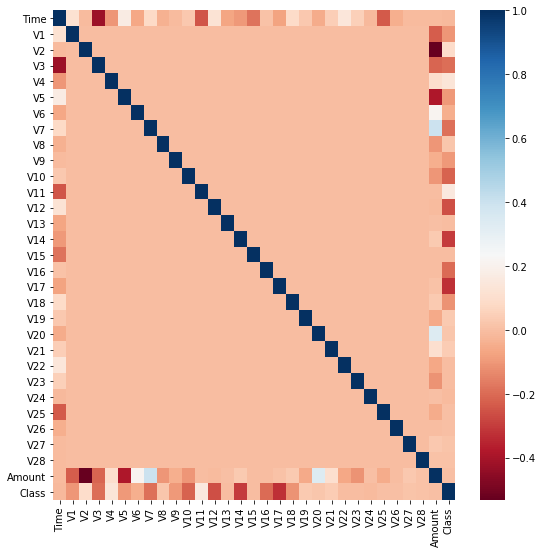

In [19]:
import seaborn as sns 
plt.figure(figsize=(9,9))
corr = card_df.corr() 
sns.heatmap(corr,cmap='RdBu') # higher correlation means a darker blue color, and a darker red means lower correlation

The class label seems to have very strong negative correlations with features V14 and V17. Let us get rid of some anomalies for these features.  

In [24]:
import numpy as np 
def get_outlier(df=None,column=None,weight=1.5): 
    fraud = df[df['Class']==1][column] 
    quantile_25 = np.percentile(fraud.values,25) 
    quantile_75 = np.percentile(fraud.values,75) 
    iqr = quantile_75-quantile_25 
    iqr_weight = iqr*weight 
    lowest = quantile_25 - iqr_weight 
    highest = quantile_75 + iqr_weight 
    outlier_index = fraud[(fraud < lowest) | (fraud > highest)].index 
    return outlier_index 

outlier_index = get_outlier(df=card_df,column='V14',weight=1.5) 
print(outlier_index) 
outlier_index2 = get_outlier(df=card_df,column="V17",weight=1.5)
print(outlier_index2) # no outliers detected for V17 

Int64Index([8296, 8615, 9035, 9252], dtype='int64')
Int64Index([], dtype='int64')


let's write a function that preprocesses the dataframe by dropping unnecessary columns and getting rid of anomalous values. 

In [26]:
def get_preprocessed_df(df=None): 
    df_copy = df.copy() 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n) 
    df_copy.drop(['Time','Amount'],axis=1,inplace=True) 
    outlier_index = get_outlier(df=df_copy, column='V14',weight=1.5)  
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_df(card_df)
print("Logistic Regression")
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)
print("LightGBM")
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

Logistic Regression
Confusion matrix
[[85281    14]
 [   48    98]]
Accuracy = 0.9992743530623471, Precision = 0.875, Recall = 0.6712328767123288, F1 = 0.7596899224806201
LightGBM
Confusion matrix
[[85291     4]
 [   25   121]]
Accuracy = 0.9996605844969043, Precision = 0.968, Recall = 0.8287671232876712, F1 = 0.8929889298892988


Getting rid of anommalies improved recall score. 

Another bit of experiment we could do is to try upsampling. Because as we saw above, the proportion of fraud data is much smaller than non-fraud data. This may skew the training towards predicting transaction as non-fraud. By upsampling, we get a balance between fraud and non-fraud data, which may improve the learning (I anticipate that it will decrease accuracy on the test set though). 

A method of upsampling we will use is the SMOTE (synthetic minority over sampling technique), that uses the K nearest neighbors among the fraud labeled data and modifies these K neighbors, thus generating a slightly different dataset that is more balanced. More detail about SMOTE is here: https://towardsdatascience.com/upsampling-with-smote-for-classification-projects-e91d7c44e4bf 

In [29]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42) 
X_train_over, y_train_over = smote.fit_sample(X_train,y_train) 
print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_over.shape, y_train_over.shape) 
print("After SMOTE label proportion:", pd.Series(y_train_over).value_counts()) 

Using TensorFlow backend.


Before SMOTE: (199362, 29) (199362,)
After SMOTE: (398040, 29) (398040,)
After SMOTE label proportion: 1    199020
0    199020
Name: Class, dtype: int64


We end up with same number of each labels after oversampling. 

In [31]:
lr_clf = LogisticRegression() 
get_model_train_eval(lr_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train = y_train_over, tgt_test = y_test)

Confusion matrix
[[82935  2360]
 [   12   134]]
Accuracy = 0.9722381526433446, Precision = 0.053728949478749, Recall = 0.9178082191780822, F1 = 0.10151515151515153


In [33]:
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False) 
get_model_train_eval(lgbm_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

Confusion matrix
[[85288     7]
 [   23   123]]
Accuracy = 0.9996488805140389, Precision = 0.9461538461538461, Recall = 0.8424657534246576, F1 = 0.891304347826087


For both Logistic Regression and LightGBM, the precision drops but recall improves. However, there is a such a huge drop in precision for logistic regression after SMOTE that it is deemed unusable. 